In [1]:
#importing dependences
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt

FILENAME = "expenses.csv"

Load Expenses

In [2]:
def load_expenses():
    expenses = []
    if os.path.exists(FILENAME):
        with open(FILENAME, "r") as file:
            reader = csv.reader(file)
            for row in reader:
                if len(row) == 3:
                    amount, category, date = row
                    expenses.append({
                        "amount": float(amount),
                        "category": category,
                        "date": date
                    })
    return expenses

Save Expenses

In [3]:
def save_expenses(expenses):
    with open(FILENAME, "w", newline="") as file:
        writer = csv.writer(file)
        for exp in expenses:
            writer.writerow([exp["amount"], exp["category"], exp["date"]])

Add Expenses

In [9]:
def add_expense(expenses):
    while True:
        try:
            amount = float(input("Enter amount: "))
            break
        except ValueError:
            print("Invalid amount! Enter a number only.")

    category = input("Enter category (Food, Transport, Bills, Entertainment): ")

    while True:
        date = input("Enter date (YYYY-MM-DD): ")
        try:
            datetime.strptime(date, "%Y-%m-%d")
            break
        except:
            print("Invalid date format!")

    expenses.append({
        "amount": amount,
        "category": category,
        "date": date
    })

    print("Expense added successfully!")

View Expenses

In [5]:
def view_expenses(expenses):
    if not expenses:
        print("No expenses found.")
        return

    print("\n****** All Expenses *********")
    for i, exp in enumerate(expenses, start=1):
        print(f"{i}. ₹{exp['amount']} | {exp['category']} | {exp['date']}")
    print("*******************\n")

Generate Report

In [11]:
def generate_report(expenses):
    if not expenses:
        print("\nNo expenses found to generate report.")
        return {} # Return an empty dictionary instead of None

    print("\n********* EXPENSE REPORT ************")

    # 1. Total spending
    total = sum(exp["amount"] for exp in expenses)
    print(f"Total Spending: ₹{total}")

    # 2. Category-wise spending
    category_totals = {}
    for exp in expenses:
        cat = exp["category"]
        category_totals[cat] = category_totals.get(cat, 0) + exp["amount"]

    print("\n****** Category-wise Spending ********")
    for cat, amt in category_totals.items():
        print(f"{cat}: ₹{amt}")

    # 3. Highest expense
    if expenses:
        highest = max(expenses, key=lambda x: x["amount"])
        print("\n****** Highest Expense ******")
        print(f"₹{highest['amount']} | {highest['category']} | {highest['date']}")
    else:
        print("\nNo highest expense to display.")

    # 4. Number of transactions
    print(f"\nTotal Transactions: {len(expenses)}")

    print("*************************\n")
    return category_totals # Return the category_totals

Data Visualization using matplot library

In [7]:
def visualize_expenses(expenses):
    totals = generate_report(expenses)

    if not totals: # Check if totals is empty
        print("No data to visualize.")
        return

    categories = list(totals.keys())
    amounts = list(totals.values())

    # Bar Chart
    plt.figure(figsize=(6,4))
    plt.bar(categories, amounts)
    plt.title("Category-wise Spending")
    plt.xlabel("Category")
    plt.ylabel("Amount")
    plt.show()

    # Pie Chart
    plt.figure(figsize=(5,5))
    plt.pie(amounts, labels=categories, autopct="%1.1f%%")
    plt.title("Spending Distribution")
    plt.show()

Menu system


Welcome To Expense Tracker!! How Can I help You Today?
1. Add Expense
2. View Expenses
3. Category Report
4. Visualize Expenses
5. Save & Exit
***********************

Enter choice: 1
Enter amount: 20
Enter category (Food, Transport, Bills, Entertainment): car
Enter date (YYYY-MM-DD): 2018-0-09
Invalid date format!
Enter date (YYYY-MM-DD): 2018-08-09
Expense added successfully!

Welcome To Expense Tracker!! How Can I help You Today?
1. Add Expense
2. View Expenses
3. Category Report
4. Visualize Expenses
5. Save & Exit
***********************

Enter choice: 2

****** All Expenses *********
1. ₹20.0 | car | 2018-08-09
*******************


Welcome To Expense Tracker!! How Can I help You Today?
1. Add Expense
2. View Expenses
3. Category Report
4. Visualize Expenses
5. Save & Exit
***********************

Enter choice: 3

********* EXPENSE REPORT ************
Total Spending: ₹20.0

****** Category-wise Spending ********
car: ₹20.0

--- Highest Expense ---
₹20.0 | car | 2018-08-09

Total

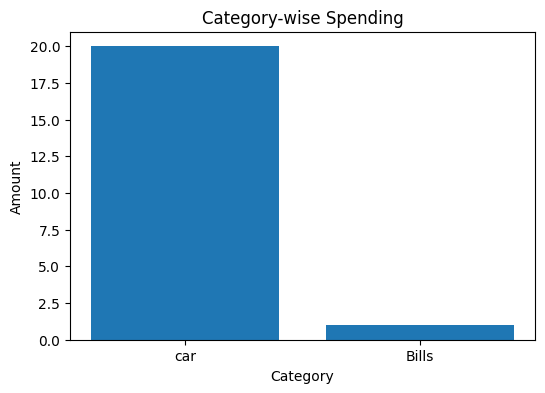

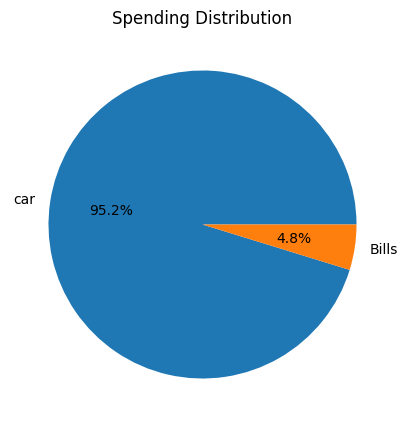


Welcome To Expense Tracker!! How Can I help You Today?
1. Add Expense
2. View Expenses
3. Category Report
4. Visualize Expenses
5. Save & Exit
***********************

Enter choice: 5
Data saved! Exiting......


In [10]:
def menu():
    expenses = load_expenses()

    while True:
        print("\nWelcome To Expense Tracker!! How Can I help You Today?")
        print("1. Add Expense")
        print("2. View Expenses")
        print("3. Category Report")
        print("4. Visualize Expenses")
        print("5. Save & Exit")
        print("***********************\n")

        choice = input("Enter choice: ")

        if choice == "1":
            add_expense(expenses)
        elif choice == "2":
            view_expenses(expenses)
        elif choice == "3":
            generate_report(expenses)
        elif choice == "4":
            visualize_expenses(expenses)
        elif choice == "5":
            save_expenses(expenses)
            print("Data saved! Exiting......")
            break
        else:
            print("Invalid choice!!Please Try Again")


menu()